#Concrete compressive strength prediction

**Concrete is the most important material in civil engineering.
The concrete compressive strength is a highly nonlinear function of age and ingredients.**

## Importing The Libreries

In [103]:
#For numerical libraries
import numpy as np
#To handle data in the form of rows and columns
import pandas as pd
#importing seaborn for statistical plots
import seaborn as sns
#importing ploting libraries
import matplotlib.pyplot as plt
#styling figures
plt.rc('font',size=14)
sns.set(style='white')
sns.set(style='whitegrid',color_codes=True)
#To enable plotting graphs in Jupyter notebook
%matplotlib inline
#importing the feature scaling library
from sklearn.preprocessing import StandardScaler
#Import Sklearn package's data splitting function which is based on random function
from sklearn.model_selection import train_test_split
# Import Linear Regression, Ridge and Lasso machine learning library
from sklearn.linear_model import LinearRegression, Ridge, Lasso
# Import KNN Regressor machine learning library
from sklearn.neighbors import KNeighborsRegressor
# Import Decision Tree Regressor machine learning library
from sklearn.tree import DecisionTreeRegressor
# Import ensemble machine learning library
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor)
# Import support vector regressor machine learning library
from sklearn.svm import SVR
#Import the metrics
from sklearn import metrics
#Import the Voting regressor for Ensemble
from sklearn.ensemble import VotingRegressor
# Import stats from scipy
from scipy import stats
# Import zscore for scaling
from scipy.stats import zscore
#importing the metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
#importing the K fold
from sklearn.model_selection import KFold
#importing the cross validation score
from sklearn.model_selection import cross_val_score
#importing the preprocessing library
from sklearn import preprocessing
# importing the Polynomial features
from sklearn.preprocessing import PolynomialFeatures
#importing kmeans clustering library
from sklearn.cluster import KMeans
from sklearn.utils import resample


## 2. Load the dataset

In [104]:
from google.colab import files
upload = files.upload()

Saving Concrete_Data_Yeh.csv to Concrete_Data_Yeh (1).csv


In [105]:
df = pd.read_csv('Concrete_Data_Yeh.csv')

In [106]:
df.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


#About data:

**Given are the variable name, variable type, the measurement unit, and a brief description. The concrete compressive strength is the regression problem. The order of this listing corresponds to the order of numerals along the rows of the database.**

* Name -- Data Type -- Measurement -- Description
* Cement (component 1) -- quantitative -- kg in a m3 mixture -- Input Variable
* Blast Furnace Slag (component 2) -- quantitative -- kg in a m3 mixture -- Input Variable
* Fly Ash (component 3) -- quantitative -- kg in a m3 mixture -- Input Variable
* Water (component 4) -- quantitative -- kg in a m3 mixture -- Input Variable
* Superplasticizer (component 5) -- quantitative -- kg in a m3 mixture -- Input Variable
* Coarse Aggregate (component 6) -- quantitative -- kg in a m3 mixture -- Input Variable
* Fine Aggregate (component 7) -- quantitative -- kg in a m3 mixture -- Input Variable
* Age -- quantitative -- Day (1~365) -- Input Variable
* Concrete compressive strength -- quantitative -- MPa -- Output Variable

It shows that there are eight independent variables ( cement, slag, ash, water, superplastic, coarseagg, fineagg, age) and one dependent variable (strength).
All the records are numeric.


In [107]:
#Check the last few records of the datas
df.tail()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77
1029,260.9,100.5,78.3,200.6,8.6,864.5,761.5,28,32.40


## 3. Exploratory data quality report
Data Types and Description

In [108]:
#To show the detailed summary 
print('Number of rows',df.shape[0])
print('Number of columns',df.shape[1])
print(df.info())

Number of rows 1030
Number of columns 9
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   flyash            1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarseaggregate   1030 non-null   float64
 6   fineaggregate     1030 non-null   float64
 7   age               1030 non-null   int64  
 8   csMPa             1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB
None


* It gives the details about the number of rows (1030), number of columns (9), data types information i.e. except age which is integer type all other columns are float type. Memory usage is 72.5 KB. Also,there are no null values in the data.

In [109]:
# Data types information
df.dtypes

cement              float64
slag                float64
flyash              float64
water               float64
superplasticizer    float64
coarseaggregate     float64
fineaggregate       float64
age                   int64
csMPa               float64
dtype: object

In [110]:
# Missing Values
print('Number of missing values', df.isnull().sum())
'The dataset contains no missing values'

Number of missing values cement              0
slag                0
flyash              0
water               0
superplasticizer    0
coarseaggregate     0
fineaggregate       0
age                 0
csMPa               0
dtype: int64


'The dataset contains no missing values'

In [111]:
#To get the columns name
df.columns

Index(['cement', 'slag', 'flyash', 'water', 'superplasticizer',
       'coarseaggregate', 'fineaggregate', 'age', 'csMPa'],
      dtype='object')

In [112]:
#Analyze the distribution of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
flyash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplasticizer,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseaggregate,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineaggregate,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
csMPa,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


* It gives the descriptive statistics (mean, median, mode, percentiles, min, max, standard deviation) and count of the columns of the dataset.
* We can see that cement,slag,ash are left skewed.

#3.1. Univariate  Analysis of independent attributes
#### Cement

In [113]:
print('Range of values: ',df['cement'].max()-df['cement'].min())

Range of values:  438.0


In [114]:
# Central values
print('Minimum age: ', df['cement'].min())
print('Maximum age: ',df['cement'].max())
print('Mean value: ', df['cement'].mean())
print('Median value: ',df['cement'].median())
print('Standard deviation: ',df['cement'].std())

Minimum age:  102.0
Maximum age:  540.0
Mean value:  281.16786407766995
Median value:  272.9
Standard deviation:  104.50636449481532


Quartile


In [115]:
Q1=df['cement'].quantile(q=0.25)
Q3=df['cement'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(df['cement']))

1st Quartile (Q1) is:  192.375
3st Quartile (Q3) is:  350.0
Interquartile range (IQR) is  157.625


In [116]:
# Outlier detection from Interquartile range (IQR) in original data
# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in cement: ', L_outliers)
print('Upper outliers in cement: ', U_outliers)

Lower outliers in cement:  -44.0625
Upper outliers in cement:  586.4375


In [117]:
print('Number of outliers in cement upper : ', df[df['cement']>586.4375]['cement'].count())
print('Number of outliers in cement lower : ', df[df['cement']<-44.0625]['cement'].count())
print('% of Outlier in cement upper: ',round(df[df['cement']>586.4375]['cement'].count()*100/len(df)), '%')
print('% of Outlier in cement lower: ',round(df[df['cement']<-44.0625]['cement'].count()*100/len(df)), '%')

Number of outliers in cement upper :  0
Number of outliers in cement lower :  0
% of Outlier in cement upper:  0 %
% of Outlier in cement lower:  0 %


/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


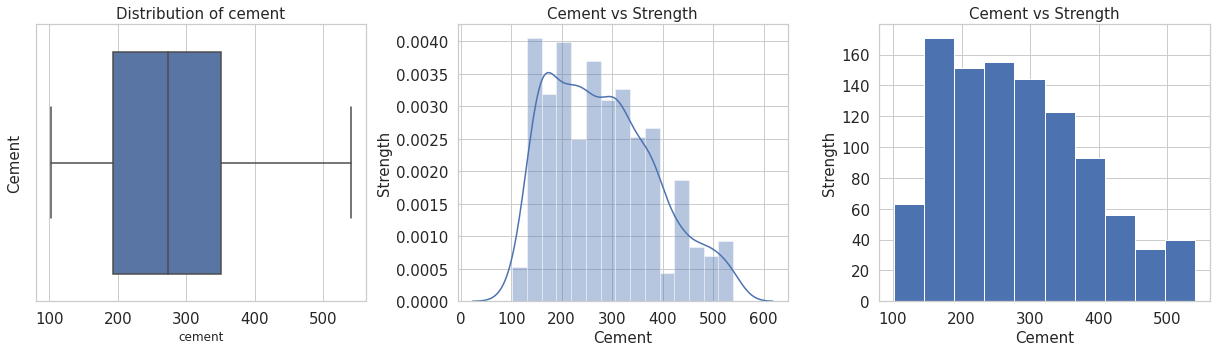

In [118]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(17,5))

#boxplot
sns.boxplot(x='cement',data=df,orient='v',ax=ax1)
ax1.set_ylabel('Cement', fontsize=15)
ax1.set_title('Distribution of cement', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['cement'],ax=ax2)
ax2.set_xlabel('Cement', fontsize=15)
ax2.set_ylabel('Strength', fontsize=15)
ax2.set_title('Cement vs Strength', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['cement'])
ax3.set_xlabel('Cement', fontsize=15)
ax3.set_ylabel('Strength', fontsize=15)
ax3.set_title('Cement vs Strength', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

### for other columns

In [119]:
col = ['slag',	'flyash',	'water',	'superplasticizer',	'coarseaggregate',	'fineaggregate',	'age']

In [120]:
# Range of values observed
for c in col:
  print('Range of values for',c,':  ', df[c].max()-df[c].min())

Range of values for slag :   359.4
Range of values for flyash :   200.1
Range of values for water :   125.2
Range of values for superplasticizer :   32.2
Range of values for coarseaggregate :   344.0
Range of values for fineaggregate :   398.6
Range of values for age :   364


In [121]:
# Central values
for c in col:
  print(c)
  print('Minimum',c,':  ', df[c].min())
  print('Maximum',c, ':  ',df[c].max())
  print('Mean value of',c,': ', df[c].mean())
  print('Median value of',c,':  ',df[c].median())
  print('Standard deviation',c,':  ',df[c].std())

slag
Minimum slag :   0.0
Maximum slag :   359.4
Mean value of slag :  73.89582524271846
Median value of slag :   22.0
Standard deviation slag :   86.27934174810584
flyash
Minimum flyash :   0.0
Maximum flyash :   200.1
Mean value of flyash :  54.18834951456311
Median value of flyash :   0.0
Standard deviation flyash :   63.99700415268765
water
Minimum water :   121.8
Maximum water :   247.0
Mean value of water :  181.56728155339806
Median value of water :   185.0
Standard deviation water :   21.35421856503247
superplasticizer
Minimum superplasticizer :   0.0
Maximum superplasticizer :   32.2
Mean value of superplasticizer :  6.204660194174758
Median value of superplasticizer :   6.4
Standard deviation superplasticizer :   5.97384139248552
coarseaggregate
Minimum coarseaggregate :   801.0
Maximum coarseaggregate :   1145.0
Mean value of coarseaggregate :  972.9189320388349
Median value of coarseaggregate :   968.0
Standard deviation coarseaggregate :   77.75395396672077
fineaggregate
M

### Quartiles

Outlier detection from Interquartile range (IQR) in original data

In [122]:
for c in col:
  print(c)
  Q1=df[c].quantile(q=0.25)
  Q3=df[c].quantile(q=0.75)
  print('1st Quartile (Q1) is: ', Q1)
  print('3st Quartile (Q3) is: ', Q3)
  print('Interquartile range (IQR) is ', stats.iqr(df[c]))

# Outlier detection from Interquartile range (IQR) in original data
# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR

  L_outliers=Q1-1.5*(Q3-Q1)
  U_outliers=Q3+1.5*(Q3-Q1)
  print('Lower outliers in',c, ':  ', L_outliers)
  print('Upper outliers in',c,':  ', U_outliers)

slag
1st Quartile (Q1) is:  0.0
3st Quartile (Q3) is:  142.95
Interquartile range (IQR) is  142.95
Lower outliers in slag :   -214.42499999999998
Upper outliers in slag :   357.375
flyash
1st Quartile (Q1) is:  0.0
3st Quartile (Q3) is:  118.3
Interquartile range (IQR) is  118.3
Lower outliers in flyash :   -177.45
Upper outliers in flyash :   295.75
water
1st Quartile (Q1) is:  164.9
3st Quartile (Q3) is:  192.0
Interquartile range (IQR) is  27.099999999999994
Lower outliers in water :   124.25000000000001
Upper outliers in water :   232.64999999999998
superplasticizer
1st Quartile (Q1) is:  0.0
3st Quartile (Q3) is:  10.2
Interquartile range (IQR) is  10.2
Lower outliers in superplasticizer :   -15.299999999999999
Upper outliers in superplasticizer :   25.5
coarseaggregate
1st Quartile (Q1) is:  932.0
3st Quartile (Q3) is:  1029.4
Interquartile range (IQR) is  97.40000000000009
Lower outliers in coarseaggregate :   785.8999999999999
Upper outliers in coarseaggregate :   1175.50000000

###Slag

In [123]:
# Range of values observed
print('Range of values: ', df['slag'].max()-df['slag'].min())

Range of values:  359.4


In [124]:
# central values
print('Minimum slag: ', df['slag'].min())
print('Maximum slag: ',df['slag'].max())
print('Mean value: ', df['slag'].mean())
print('Median value: ',df['slag'].median())
print('Standard deviation: ', df['slag'].std())
print('Null values: ',df['slag'].isnull().any())

Minimum slag:  0.0
Maximum slag:  359.4
Mean value:  73.89582524271846
Median value:  22.0
Standard deviation:  86.27934174810584
Null values:  False


In [125]:
Q1=df['slag'].quantile(q=0.25)
Q3=df['slag'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(df['slag']))

1st Quartile (Q1) is:  0.0
3st Quartile (Q3) is:  142.95
Interquartile range (IQR) is  142.95


In [126]:
# Outlier detection from Interquartile range (IQR) in original data
# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in slag: ', L_outliers)
print('Upper outliers in slag: ', U_outliers)

Lower outliers in slag:  -214.42499999999998
Upper outliers in slag:  357.375


In [127]:
print('Number of outliers in slag upper : ', df[df['slag']>357.375]['slag'].count())
print('Number of outliers in slag lower : ', df[df['slag']<-214.425]['slag'].count())
print('% of Outlier in slag upper: ',round(df[df['slag']>357.375]['slag'].count()*100/len(df)), '%')
print('% of Outlier in slag lower: ',round(df[df['slag']<-214.425]['slag'].count()*100/len(df)), '%')

Number of outliers in slag upper :  2
Number of outliers in slag lower :  0
% of Outlier in slag upper:  0 %
% of Outlier in slag lower:  0 %


/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


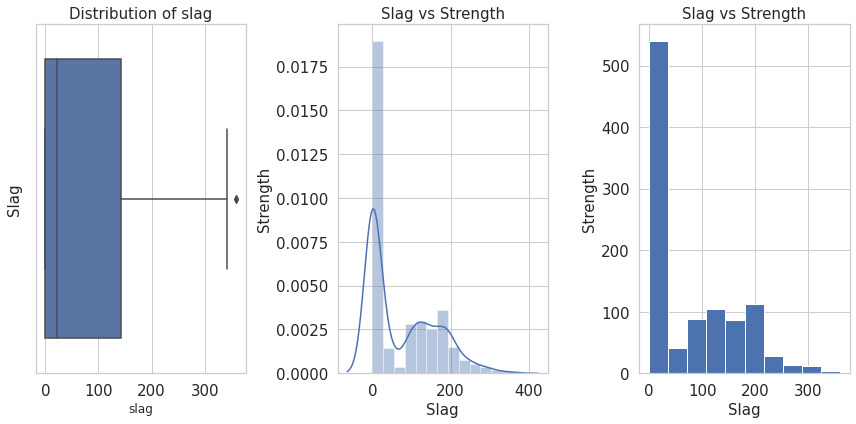

In [128]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(12,6))

#boxplot
sns.boxplot(x='slag',data=df,orient='v',ax=ax1)
ax1.set_ylabel('Slag', fontsize=15)
ax1.set_title('Distribution of slag', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['slag'],ax=ax2)
ax2.set_xlabel('Slag', fontsize=15)
ax2.set_ylabel('Strength', fontsize=15)
ax2.set_title('Slag vs Strength', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['slag'])
ax3.set_xlabel('Slag', fontsize=15)
ax3.set_ylabel('Strength', fontsize=15)
ax3.set_title('Slag vs Strength', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

## FlyAsh

In [129]:
# Range of values observed
print('Range of values: ', df['flyash'].max()-df['flyash'].min())

# Central values
print('Minimum ash: ', df['flyash'].min())
print('Maximum ash: ',df['flyash'].max())
print('Mean value: ', df['flyash'].mean())
print('Median value: ',df['flyash'].median())
print('Standard deviation: ', df['flyash'].std())

# Quartile
Q1=df['flyash'].quantile(q=0.25)
Q3=df['flyash'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(df['flyash']))

# Outlier detection from Interquartile range (IQR) in original data
# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in ash: ', L_outliers)
print('Upper outliers in ash: ', U_outliers)

print('Number of outliers in ash upper : ', df[df['flyash']>295.75]['flyash'].count())
print('Number of outliers in ash lower : ', df[df['flyash']<-177.45]['flyash'].count())
print('% of Outlier in ash upper: ',round(df[df['flyash']>295.75]['flyash'].count()*100/len(df)), '%')
print('% of Outlier in ash lower: ',round(df[df['flyash']<-177.45]['flyash'].count()*100/len(df)), '%')

Range of values:  200.1
Minimum ash:  0.0
Maximum ash:  200.1
Mean value:  54.18834951456311
Median value:  0.0
Standard deviation:  63.99700415268765
1st Quartile (Q1) is:  0.0
3st Quartile (Q3) is:  118.3
Interquartile range (IQR) is  118.3
Lower outliers in ash:  -177.45
Upper outliers in ash:  295.75
Number of outliers in ash upper :  0
Number of outliers in ash lower :  0
% of Outlier in ash upper:  0 %
% of Outlier in ash lower:  0 %


/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


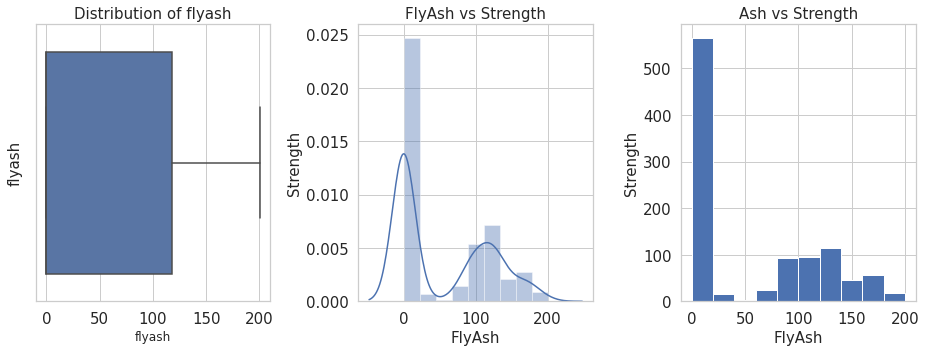

In [130]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='flyash',data=df,orient='v',ax=ax1)
ax1.set_ylabel('flyash', fontsize=15)
ax1.set_title('Distribution of flyash', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['flyash'],ax=ax2)
ax2.set_xlabel('FlyAsh', fontsize=15)
ax2.set_ylabel('Strength', fontsize=15)
ax2.set_title('FlyAsh vs Strength', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['flyash'])
ax3.set_xlabel('FlyAsh', fontsize=15)
ax3.set_ylabel('Strength', fontsize=15)
ax3.set_title('Ash vs Strength', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

### Water

In [131]:
df.head(1)

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99


In [132]:
# Range of values observed
print('Range of values: ', df['water'].max()-df['water'].min())

# Central values
print('Minimum water: ', df['water'].min())
print('Maximum water: ',df['water'].max())
print('Mean value: ', df['water'].mean())
print('Median value: ',df['water'].median())
print('Standard deviation: ', df['water'].std())

# Quartile
Q1=df['water'].quantile(q=0.25)
Q3=df['water'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(df['water']))

# Outlier detection from Interquartile range (IQR) in original data
# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in water: ', L_outliers)
print('Upper outliers in water: ', U_outliers)

print('Number of outliers in water upper : ', df[df['water']>295.75]['water'].count())
print('Number of outliers in water lower : ', df[df['water']<-177.45]['water'].count())
print('% of Outlier in water upper: ',round(df[df['water']>295.75]['water'].count()*100/len(df)), '%')
print('% of Outlier in water lower: ',round(df[df['water']<-177.45]['water'].count()*100/len(df)), '%')

Range of values:  125.2
Minimum water:  121.8
Maximum water:  247.0
Mean value:  181.56728155339806
Median value:  185.0
Standard deviation:  21.35421856503247
1st Quartile (Q1) is:  164.9
3st Quartile (Q3) is:  192.0
Interquartile range (IQR) is  27.099999999999994
Lower outliers in water:  124.25000000000001
Upper outliers in water:  232.64999999999998
Number of outliers in water upper :  0
Number of outliers in water lower :  0
% of Outlier in water upper:  0 %
% of Outlier in water lower:  0 %


/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


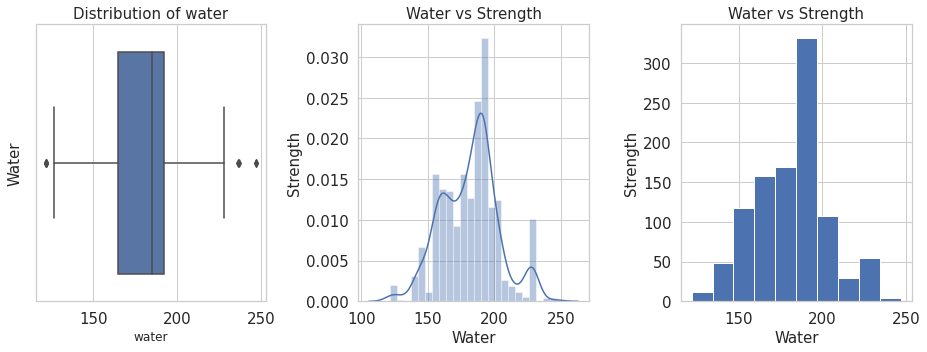

In [133]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='water',data=df,orient='v',ax=ax1)
ax1.set_ylabel('Water', fontsize=15)
ax1.set_title('Distribution of water', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['water'],ax=ax2)
ax2.set_xlabel('Water', fontsize=15)
ax2.set_ylabel('Strength', fontsize=15)
ax2.set_title('Water vs Strength', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['water'])
ax3.set_xlabel('Water', fontsize=15)
ax3.set_ylabel('Strength', fontsize=15)
ax3.set_title('Water vs Strength', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 



```
# This is formatted as code
```

### Superplastic

In [134]:
print('Number of outliers in superplastic upper : ', df[df['superplasticizer']>25.5]['superplasticizer'].count())
print('Number of outliers in superplastic lower : ', df[df['superplasticizer']<-15.3]['superplasticizer'].count())
print('% of Outlier in superplastic upper: ',round(df[df['superplasticizer']>25.5]['superplasticizer'].count()*100/len(df)), '%')
print('% of Outlier in superplastic lower: ',round(df[df['superplasticizer']<-15.3]['superplasticizer'].count()*100/len(df)), '%')

Number of outliers in superplastic upper :  10
Number of outliers in superplastic lower :  0
% of Outlier in superplastic upper:  1 %
% of Outlier in superplastic lower:  0 %


/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


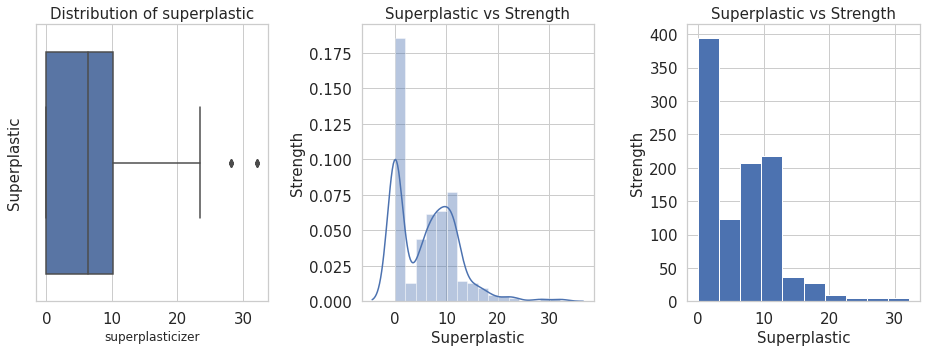

In [135]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='superplasticizer',data=df,orient='v',ax=ax1)
ax1.set_ylabel('Superplastic', fontsize=15)
ax1.set_title('Distribution of superplastic', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['superplasticizer'],ax=ax2)
ax2.set_xlabel('Superplastic', fontsize=15)
ax2.set_ylabel('Strength', fontsize=15)
ax2.set_title('Superplastic vs Strength', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['superplasticizer'])
ax3.set_xlabel('Superplastic', fontsize=15)
ax3.set_ylabel('Strength', fontsize=15)
ax3.set_title('Superplastic vs Strength', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

###	coarseaggregate

In [136]:
print('Number of outliers in coarseagg upper : ', df[df['coarseaggregate']>1175.5]['coarseaggregate'].count())
print('Number of outliers in coarseagg lower : ', df[df['coarseaggregate']<785.9]['coarseaggregate'].count())
print('% of Outlier in coarseagg upper: ',round(df[df['coarseaggregate']>1175.5]['coarseaggregate'].count()*100/len(df)), '%')
print('% of Outlier in coarseagg lower: ',round(df[df['coarseaggregate']<785.9]['coarseaggregate'].count()*100/len(df)), '%')

Number of outliers in coarseagg upper :  0
Number of outliers in coarseagg lower :  0
% of Outlier in coarseagg upper:  0 %
% of Outlier in coarseagg lower:  0 %


/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


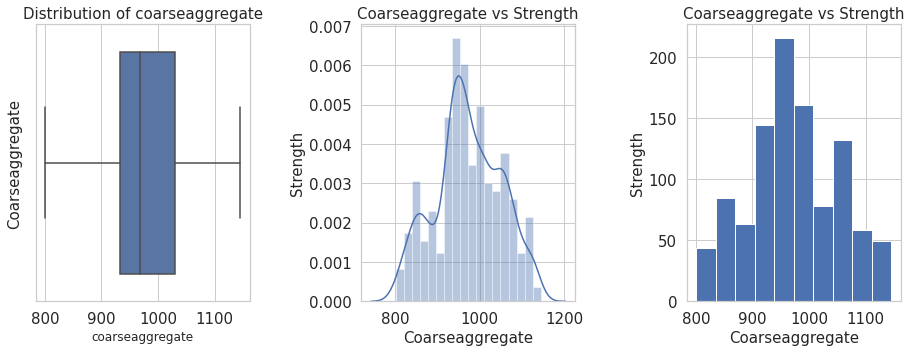

In [137]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='coarseaggregate',data=df,orient='v',ax=ax1)
ax1.set_ylabel('Coarseaggregate', fontsize=15)
ax1.set_title('Distribution of coarseaggregate', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['coarseaggregate'],ax=ax2)
ax2.set_xlabel('Coarseaggregate', fontsize=15)
ax2.set_ylabel('Strength', fontsize=15)
ax2.set_title('Coarseaggregate vs Strength', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['coarseaggregate'])
ax3.set_xlabel('Coarseaggregate', fontsize=15)
ax3.set_ylabel('Strength', fontsize=15)
ax3.set_title('Coarseaggregate vs Strength', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

### Fineaggregate	

In [138]:
print('Number of outliers in fineagg upper : ', df[df['fineaggregate']>963.575]['fineaggregate'].count())
print('Number of outliers in fineagg lower : ', df[df['fineaggregate']<591.37]['fineaggregate'].count())
print('% of Outlier in fineagg upper: ',round(df[df['fineaggregate']>963.575]['fineaggregate'].count()*100/len(df)), '%')
print('% of Outlier in fineagg lower: ',round(df[df['fineaggregate']<591.37]['fineaggregate'].count()*100/len(df)), '%')

Number of outliers in fineagg upper :  5
Number of outliers in fineagg lower :  0
% of Outlier in fineagg upper:  0 %
% of Outlier in fineagg lower:  0 %


/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


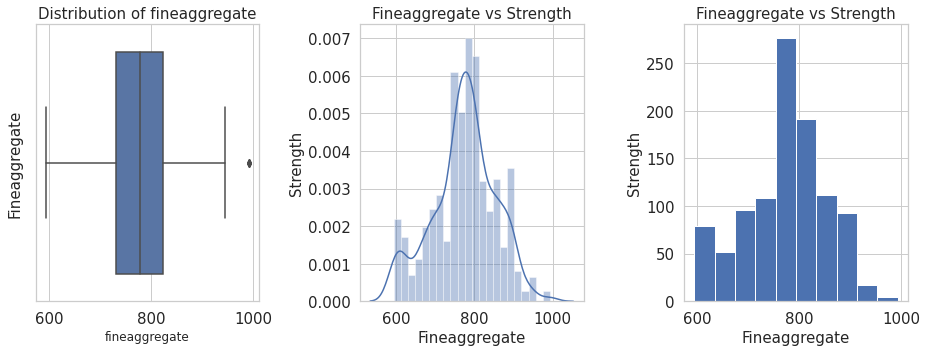

In [139]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='fineaggregate',data=df,orient='v',ax=ax1)
ax1.set_ylabel('Fineaggregate', fontsize=15)
ax1.set_title('Distribution of fineaggregate', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['fineaggregate'],ax=ax2)
ax2.set_xlabel('Fineaggregate', fontsize=15)
ax2.set_ylabel('Strength', fontsize=15)
ax2.set_title('Fineaggregate vs Strength', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['fineaggregate'])
ax3.set_xlabel('Fineaggregate', fontsize=15)
ax3.set_ylabel('Strength', fontsize=15)
ax3.set_title('Fineaggregate vs Strength', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

### Age

In [140]:
print('Number of outliers in age upper : ', df[df['age']>129.5]['age'].count())
print('Number of outliers in age lower : ', df[df['age']<-66.5]['age'].count())
print('% of Outlier in age upper: ',round(df[df['age']>129.5]['age'].count()*100/len(df)), '%')
print('% of Outlier in age lower: ',round(df[df['age']<-66.5]['age'].count()*100/len(df)), '%')

Number of outliers in age upper :  59
Number of outliers in age lower :  0
% of Outlier in age upper:  6 %
% of Outlier in age lower:  0 %


/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


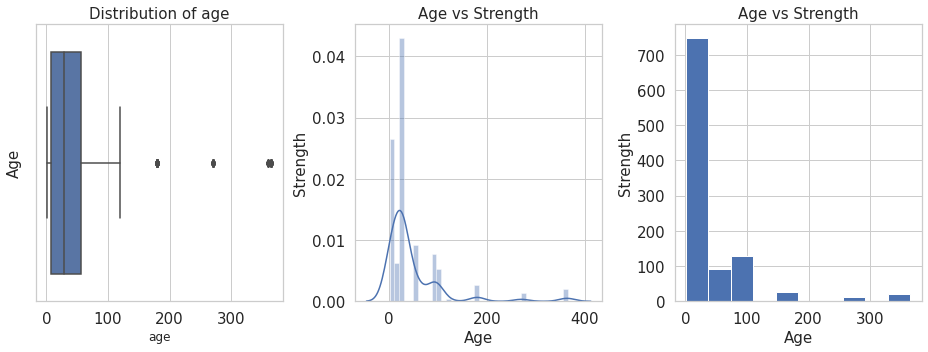

In [141]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='age',data=df,orient='v',ax=ax1)
ax1.set_ylabel('Age', fontsize=15)
ax1.set_title('Distribution of age', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['age'],ax=ax2)
ax2.set_xlabel('Age', fontsize=15)
ax2.set_ylabel('Strength', fontsize=15)
ax2.set_title('Age vs Strength', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['age'])
ax3.set_xlabel('Age', fontsize=15)
ax3.set_ylabel('Strength', fontsize=15)
ax3.set_title('Age vs Strength', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

In [142]:
df.head(1)

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99


##Perform Bivariate analysis

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

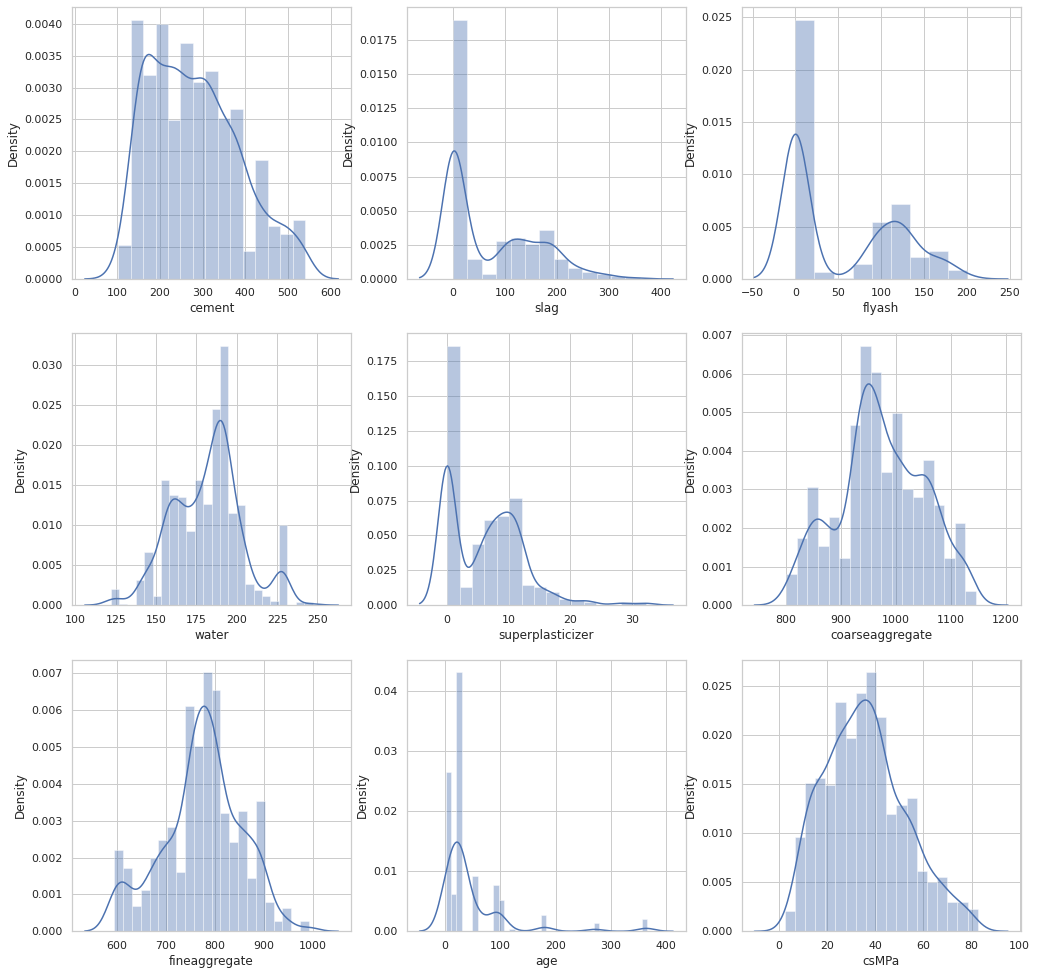

In [143]:
# Distplot
fig, ax2 = plt.subplots(3, 3, figsize=(17, 17))
sns.distplot(df['cement'],ax=ax2[0][0])
sns.distplot(df['slag'],ax=ax2[0][1])
sns.distplot(df['flyash'],ax=ax2[0][2])
sns.distplot(df['water'],ax=ax2[1][0])
sns.distplot(df['superplasticizer'],ax=ax2[1][1])
sns.distplot(df['coarseaggregate'],ax=ax2[1][2])
sns.distplot(df['fineaggregate'],ax=ax2[2][0])
sns.distplot(df['age'],ax=ax2[2][1])
sns.distplot(df['csMPa'],ax=ax2[2][2])

Observetions :

* cement is almost normal.
* slag has three gausssians and rightly skewed.
* ash has two gaussians and rightly skewed.
* water has three guassians and slighly left skewed.
* superplastic has two gaussians and rightly skewed.
* coarseagg has three guassians and almost normal.
* fineagg has almost two guassians and looks like normal.
* age has multiple guassians and rightly skewed.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbc29a78ed0>,
      dtype=object)

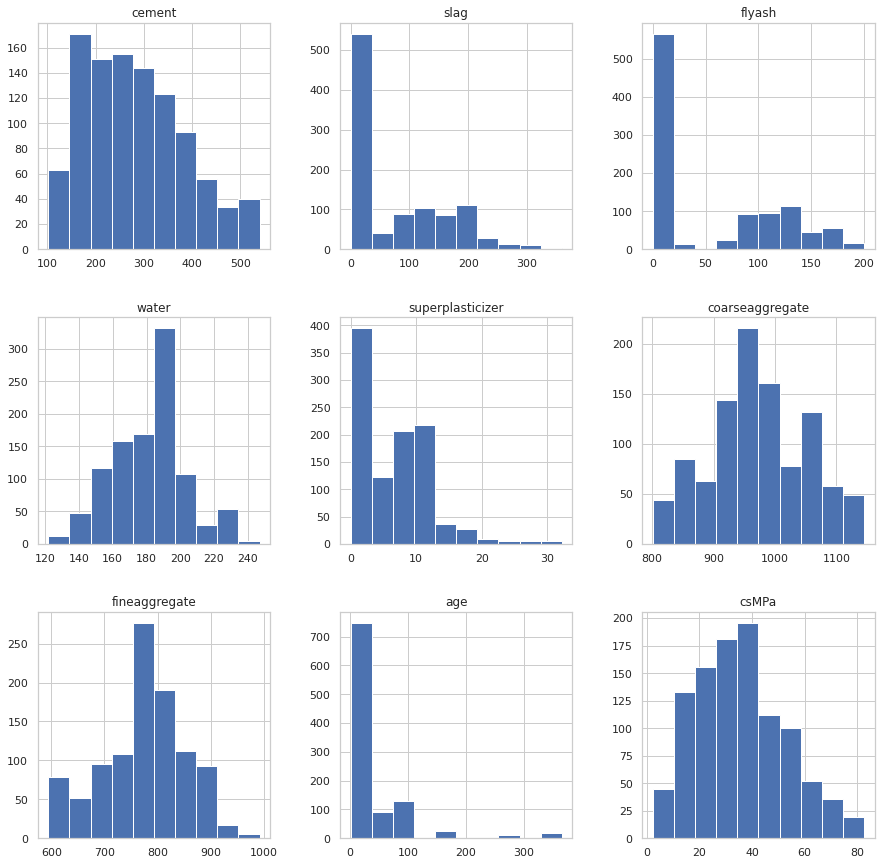

In [144]:
# Histogram 
df.hist(figsize=(15,15))

* It is also giving the same information like distance plot.

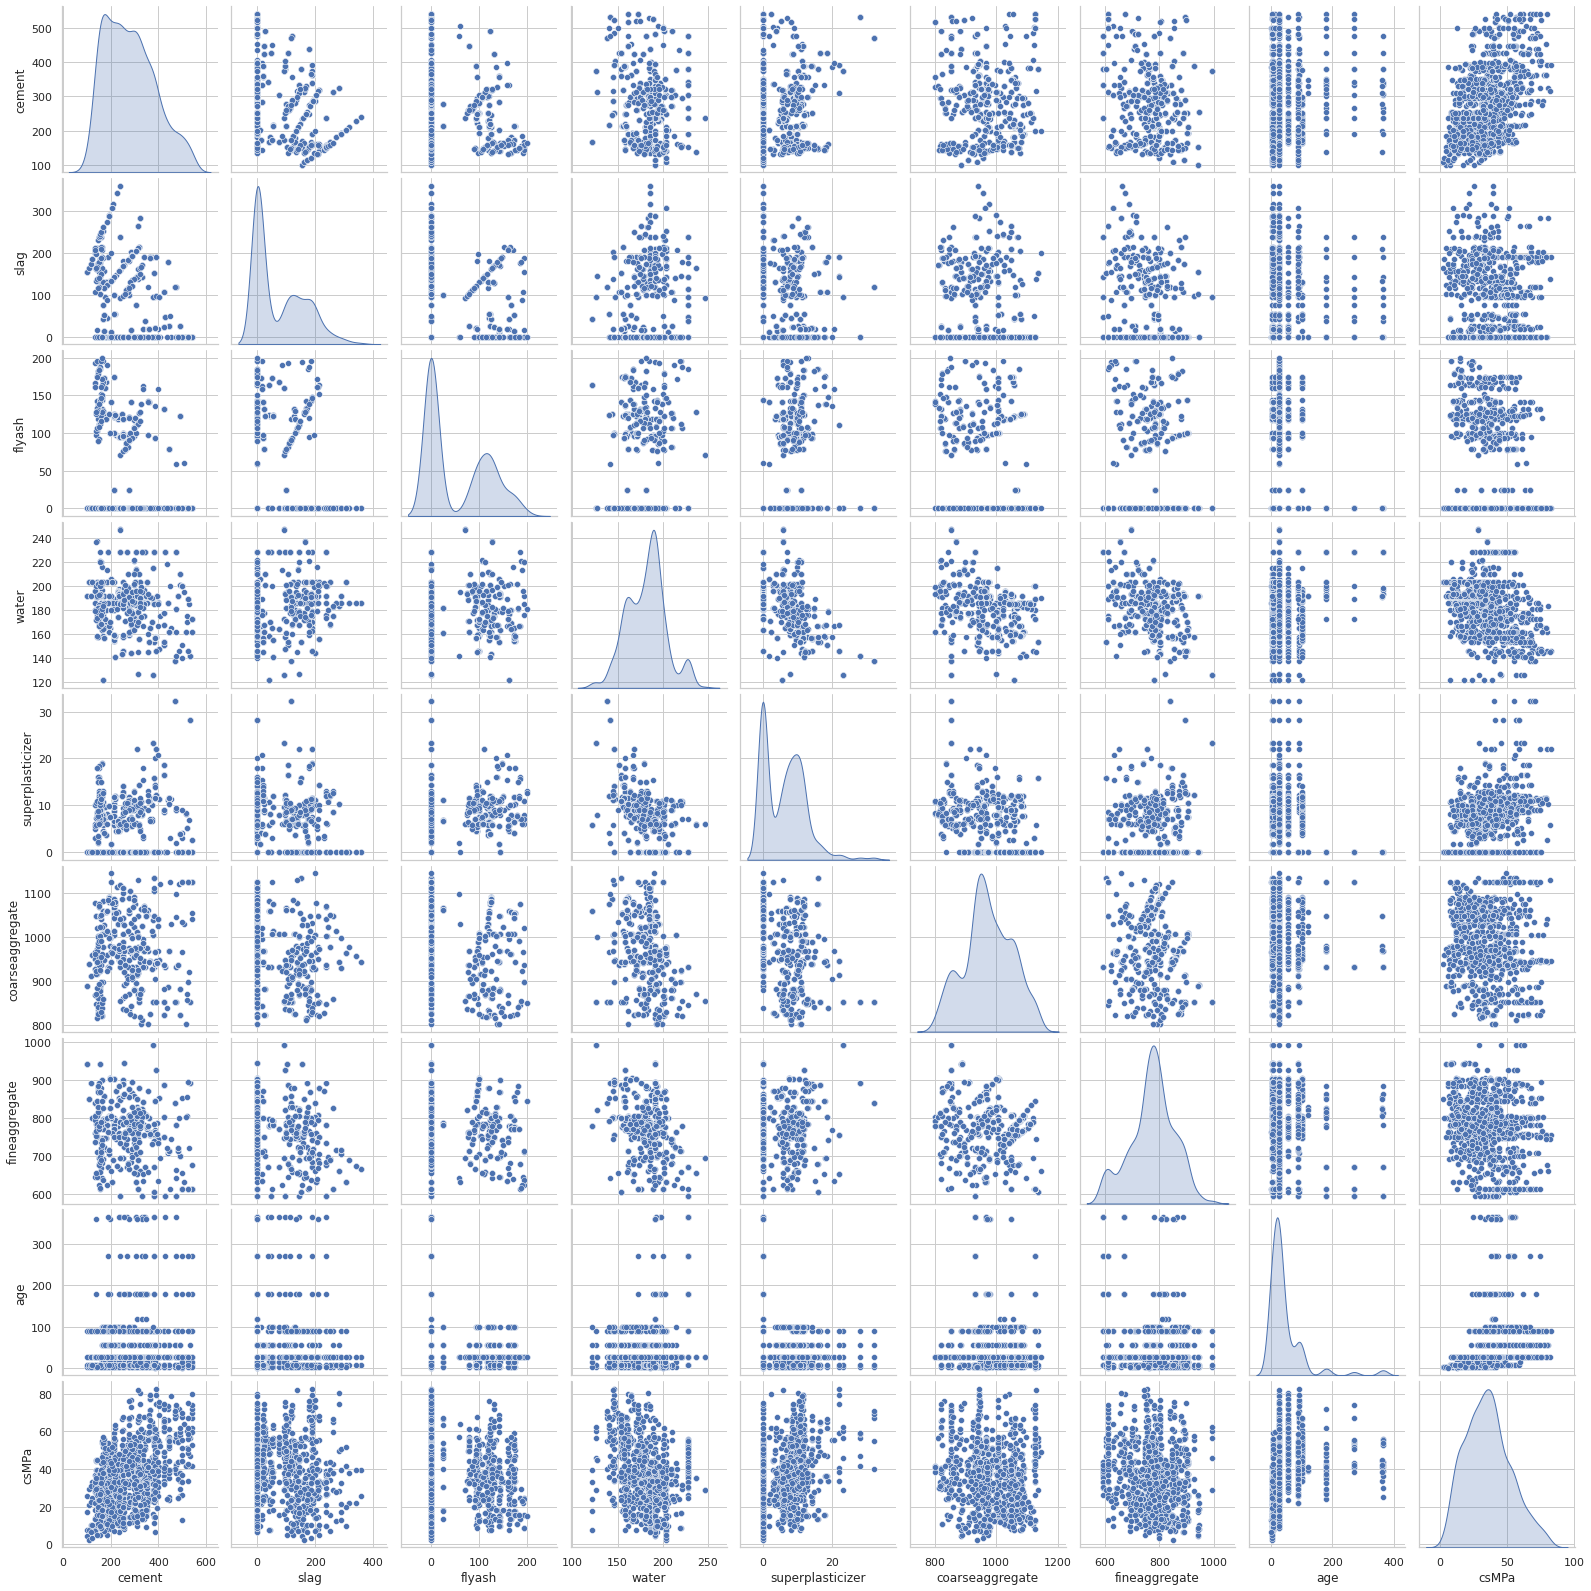

In [145]:
# pairplot- plot density curve instead of histogram in diagonal
sns.pairplot(df, diag_kind='kde')  

**Diagonals Analysis**

The diagonal gives the same information, we got using distplot.

* cement attribute have almost normal curve.
* slag has two gausssians and rightly skewed.It shows the presence of outlies.
* ash has two gaussians and rightly skewed.It shows the presence of outlies.
* water has atleast guassians and slighly left skewed.It shows the presence of outlies.
* superplastic has multiple gaussians and rightly skewed.It shows the presence of outlies.
* coarseagg has three guassians and almost normal.
* fineagg has almost two guassians and looks like normal.
age has multiple guassians and rightly skewed. It shows the presence of outlies.
* strength is close to a normal curve.

We not only have missing values problem but also outliers problem in the dataset.

**Off Diagonal Analysis:**

###Relationship between indpendent attributes
####Scatter plots
* cement vs other independent attributes: This attribute does not have any significant relation with slag, ash, water, superplatic, coarseagg,fineagg and age. It almost spread like a cloud. If we had calculated the r value it would have come close to 0.

* slag vs other independent attributes: This attribute also does not have any significant relation with ash, water, superplatic, coarseagg,fineagg and age. It almost spread like a cloud. If we had calculated the r value it would have come close to 0.

* ash vs other independent attributes: This attribute also does not have any significant relation with water, superplatic, coarseagg,fineagg and age. It almost spread like a cloud. If we had calculated the r value it would have come close to 0.

* water vs other independent attributes: This attribute have negative linear relationship with superplastic and fineagg. It does not have any significant relationship with other independent atributes. This is true as Superplasticizers allows the reduction of water in the concrete upto the extent of 30% without reducing the workability.

* superplastic vs other independent attributes:This attribute have negative linear relationship with water only. It does not have any significant relationship with other independent attributes.

* coarseagg vs other independent attributes:This attribute also does not have any significant relation with any other attributes. It almost spread like a cloud. If we had calculated the r value it would have come close to 0.

* fineagg vs other independent attributes:It has negative linear relationship with water. It does not have any significant relation with any other attributes. It almost spread like a cloud. If we had calculated the r value it would have come close to 0.

The reason why we are doing all this analysis is if we find any kind of dimensions which are very strongly correlated i.e. r value close to 1 or -1 such dimensions are giving same information to your algorithms, its a redundant dimension. So in such cases we may want to keep one and drop the other which we should keep and which we should drop depends on again your domain expertise, which one of the dimension is more prone to errors.I would like to drop that dimension. Or we have a choice to combine these dimensions and create a composite dimension out of it.

**strength attribute : Relationship between dependent and independent attributes**

strength: Now its comparing the target column with all other independent attributes and its showing us very vital information.

* strength vs cement: It is linearly related to the cement. The relationship is positive and we can see that for a given value of cement we have a multiple values of strength. Which one should we pick we don't know. Hence Cement though it has poditive relationship with the strength, it is not a very good predictor. It is a weak predictor.

* strength vs slag: There is no particular trend.

*strength vs slag: There is also no particular trend.

* strength vs age: For a given value of age, we have different values of strength. Hence, It is not a good predictor.

* strength vs superplastic:For a given value of age, we have different values of strength. Hence, It is not a good predictor.

Other attributes does not give any strong relationship with strength.
Hence, we can see that none of the independent attributes are a good predictors of the strength attribute. There is a no linear relationship between them.

There seems to be no high correlation between independant variables (features). This can be further confirmed by plotting the Pearson Correlation coefficients between the features.

In [146]:
# corrlation matrix 
cor=df.corr()
cor

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
flyash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplasticizer,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarseaggregate,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fineaggregate,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
csMPa,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


* Here, we can see the correlation value between the attributes.

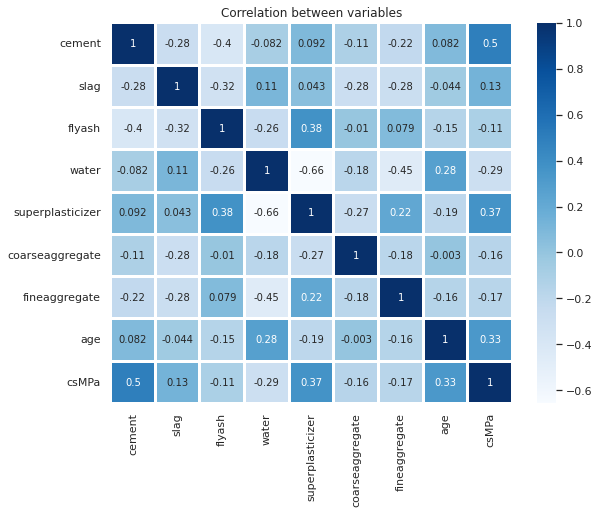

In [147]:
# Correlation Matrix
plt.figure(figsize=(9,7))
sns.heatmap(df.corr(), annot=True, linewidth=2, cmap = 'Blues')
plt.title("Correlation between variables")
plt.show()


### Observations

* It is also giving the same information we observed in pairplot analysis.
* water shows significant negative relationship with superplastic and fineagg. It also shows some kind of positive relationship with slag and age.
* There are'nt any high correlations between Compressive strength and other features except for Cement, which should be the case for more strength.

* Age and Super plasticizer are the other two features which are strongly correlated with Compressive Strength.

* Super Plasticizer seems to have a negative high correlation with Water, positive correlations with Fly ash and Fine aggregate.

We can further analyze these correlations visually by plotting these relations.



In [148]:
df.columns

Index(['cement', 'slag', 'flyash', 'water', 'superplasticizer',
       'coarseaggregate', 'fineaggregate', 'age', 'csMPa'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Compressive Strength Distribution')

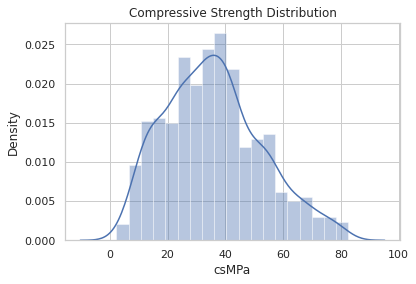

In [149]:
ax = sns.distplot(df.csMPa)
ax.set_title("Compressive Strength Distribution")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103

ValueError: ignored

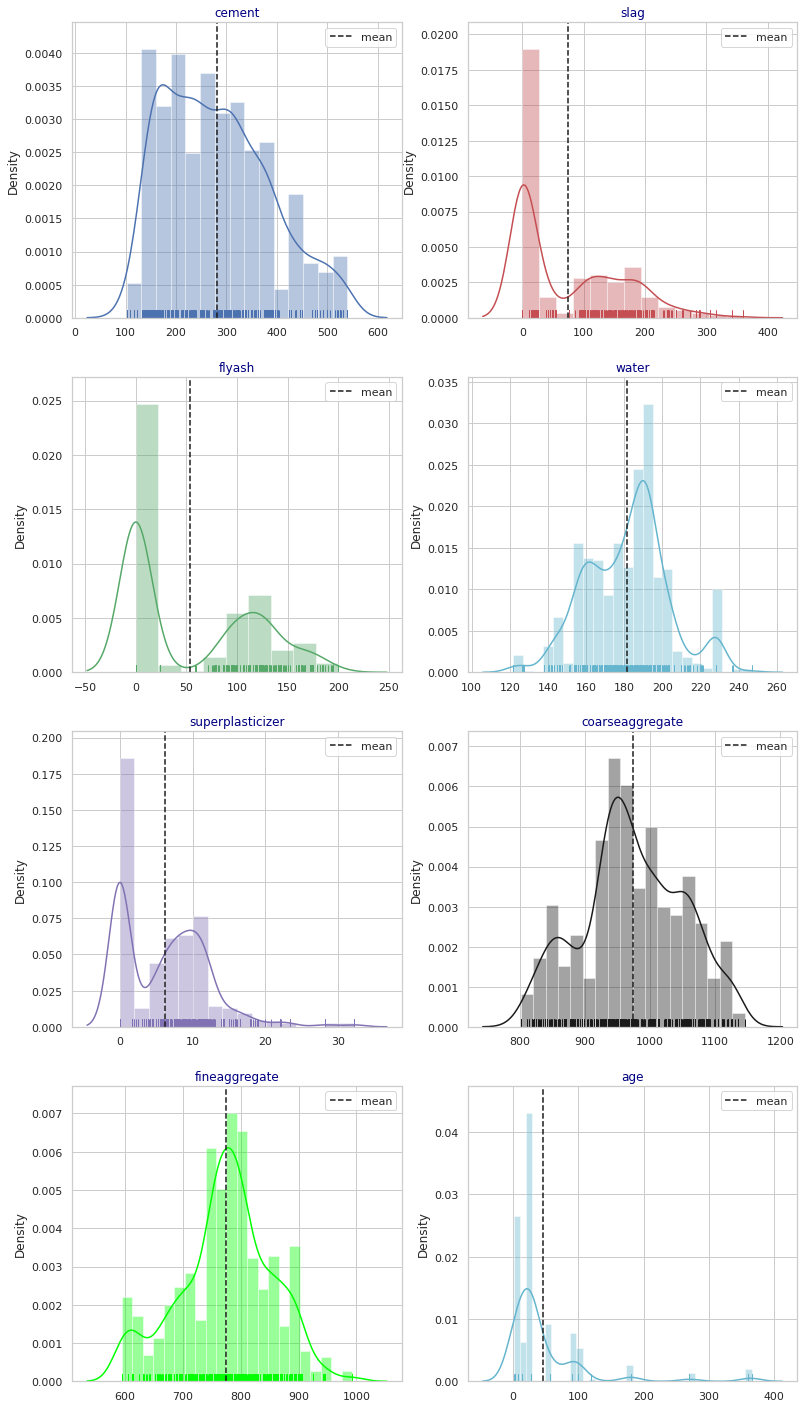

In [150]:
# Distribution of components of concrete
import itertools as it
cols = [i for i in df.columns if i not in 'compressive_strength']
length = len(cols)
cs = ["b","r","g","c","m","k","lime","c"]
fig = plt.figure(figsize=(13,25))

for i,j,k in it.zip_longest(cols,range(length),cs):
    plt.subplot(4,2,j+1)
    ax = sns.distplot(df[i],color=k,rug=True)
    ax.set_facecolor("w")
    plt.axvline(df[i].mean(),linestyle="dashed",label="mean",color="k")
    plt.legend(loc="best")
    plt.title(i,color="navy")
    plt.xlabel("")

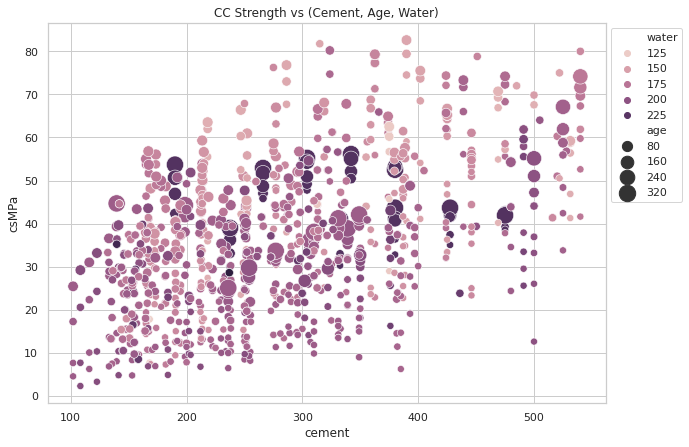

In [151]:
fig, ax = plt.subplots(figsize=(10,7))
sns.scatterplot(y="csMPa", x="cement", hue="water", size="age", data=df, ax=ax, sizes=(50, 300))
ax.set_title("CC Strength vs (Cement, Age, Water)")
ax.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.show()

## Observations from Strength vs (Cement, Age, Water)
* Compressive strength increases with amount of cement
* Compressive strength increases with age
* Cement with low age requires more cement for higher strength
* The older the cement is the more water it requires
* Concrete strength increases when less water is used in preparing it

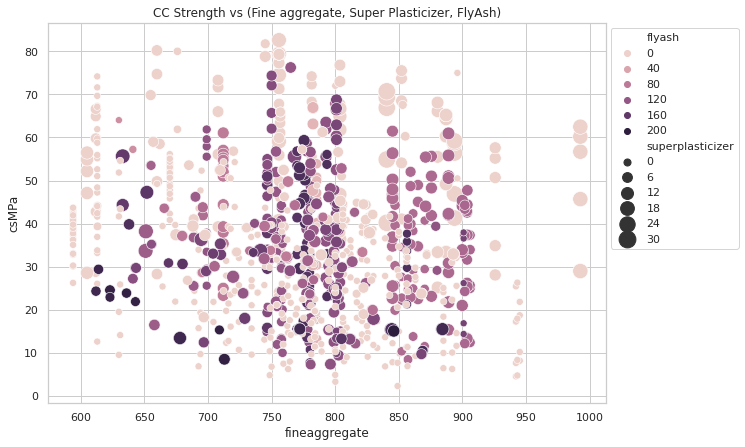

In [152]:
fig, ax = plt.subplots(figsize=(10,7))
sns.scatterplot(y="csMPa", x="fineaggregate", hue="flyash", size="superplasticizer", 
                data=df, ax=ax, sizes=(50, 300))
ax.set_title("CC Strength vs (Fine aggregate, Super Plasticizer, FlyAsh)")
ax.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.show()

**Observations from CC Strength vs (Fine aggregate, Super Plasticizer, FlyAsh)**
* As Flyash increases the strength decreases
* Strength increases with Super plasticizer

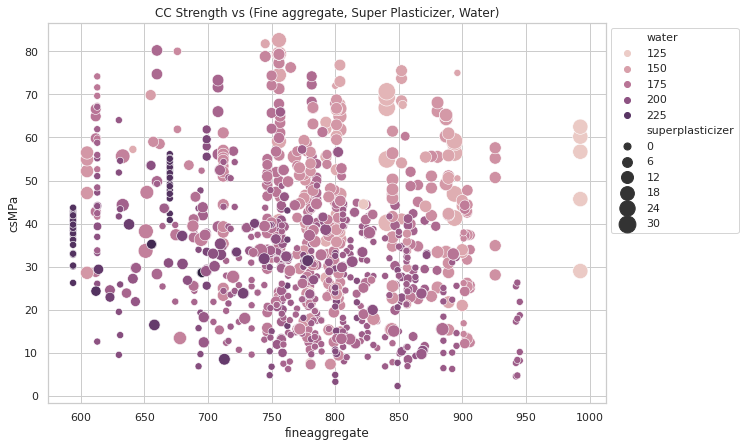

In [153]:
fig, ax = plt.subplots(figsize=(10,7))
sns.scatterplot(y="csMPa", x="fineaggregate", hue="water", size="superplasticizer", 
                data=df, ax=ax, sizes=(50, 300))
ax.set_title("CC Strength vs (Fine aggregate, Super Plasticizer, Water)")
ax.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.show()

**Observations from CC Strength vs (Fine aggregate, Super Plasticizer, Water)**

* Strength decreases with increase in water, strength increases with increase in Super plasticizer (already from above plots)
* More Fine aggregate is used when less water, more Super plasticizer is used.
Although we are making conclusions by observing the scatter plots, there is an underlying non linear interaction between features which we cannot visualize.

We can visually understand 2D, 3D and max upto 4D plots (by 4D I mean color and size represented by features) as shown above, we can further use row wise and column wise plotting features by seaborn to do further analysis, but still we lack the ability to track all these correlations by ourselves. For this reason, we can turn to Machine Learning to capture these relations and give better insights into the problem.

Fom here we will start processing the data and feed it to machine learning models to correctly predict the Compressive Strength of Concrete given the input features.

# Data Preprocessing

Separating Input Features and Target Variable.

In [154]:
X = df.iloc[:,:-1]         # Features - All columns but last
y = df.iloc[:,-1]          # Target - Last Column

Splitting data into Training and Test splits.

In [155]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45)

Scaling

Standardizing the data i.e. to rescale the features to have a mean of zero and standard deviation of 1.

In [156]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

The scaler is fit on the training data and not on testing data. Since, we are training our model on rescaled Training data and the model performs well when the testing data follows same distribution. And if the scaler is fit on testing data again, this would result in testing data having a different mean and standard deviation. Resulting in loss of performance.

# Model Building

Training Machine Learning Algorithms on the training data and making predictions on Test data.

**Linear Regression**

* The Go-to method for Regression problems.
* The Algorithm assigns coefficients to each input feature to form a linear relation between input features and target variable, so as to minimize an objective function.
* The objective function used in this case is Mean Squared Error.


In [157]:
#Model 1= Multiple linear regression
# fit a model
lm = LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)
m1=model.score(X_test, y_test)
RMSE1=np.sqrt(metrics.mean_squared_error(y_test, predictions))
print('Accuracy of model is', model.score(X_test, y_test))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Accuracy of model is 0.5809009949396222
Mean Absolute Error: 8.229612735525928
Mean Squared Error: 115.02685661951
Root Mean Squared Error: 10.725057418005276


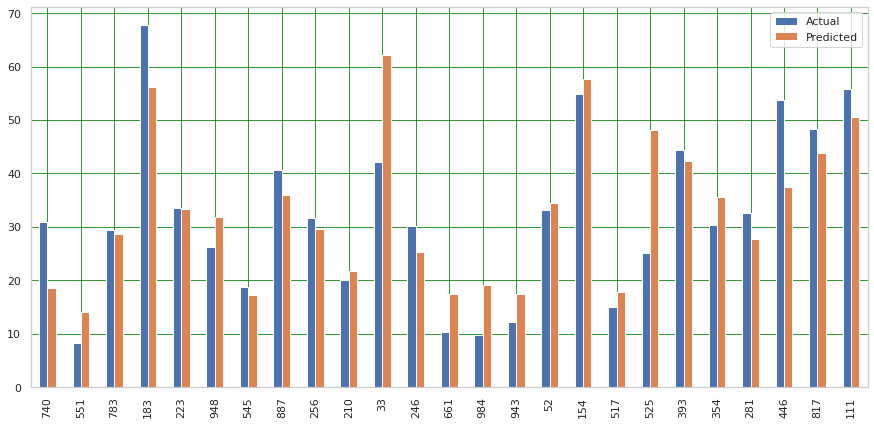

In [158]:
#Plot of true value vs. predicted values
dat = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
dat1=dat.head(25) #just a sample which shows top 25 columns
dat1.plot(kind='bar',figsize=(15,7))
plt.grid(which='major', linestyle='-', linewidth='0.8', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.8', color='black')
plt.show()

In [159]:
from sklearn.linear_model import LinearRegression

# Linear Regression
lr = LinearRegression()

# Fitting models on Training data 
lr.fit(X_train, y_train)

# Making predictions on Test data
y_pred_lr = lr.predict(X_test)

Text(0.5, 1.0, 'Linear Regression')

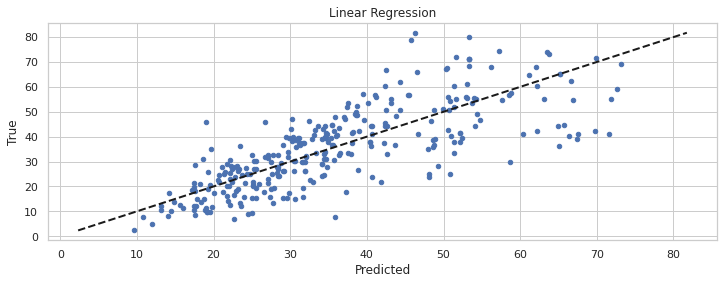

In [160]:
fig, (ax1) = plt.subplots(1, figsize=(12,4))

ax1.scatter(y_pred_lr, y_test, s=20)
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax1.set_ylabel("True")
ax1.set_xlabel("Predicted")
ax1.set_title("Linear Regression")

**Decision Trees**

Another algorithm that would give better performance in this case would be Decision Trees, since we have a lot of zeros in some of the input features as seen from their distributions in the pair plot above. This would help the decision trees build trees based on some conditions on features which can further improve performance.

In [161]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()

dtr.fit(X_train, y_train)

y_pred_dtr = dtr.predict(X_test)

print("Model\t\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""Decision Tree Regressor \t {:.2f} \t\t {:.2f} \t\t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_dtr)),mean_squared_error(y_test, y_pred_dtr),
            mean_absolute_error(y_test, y_pred_dtr), r2_score(y_test, y_pred_dtr)))



Model				 RMSE 		 MSE 		 MAE 		 R2
Decision Tree Regressor 	 7.77 		 60.37 		4.73 		0.78


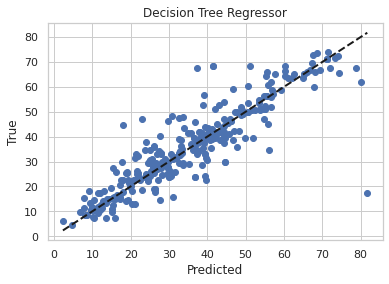

In [162]:
plt.scatter(y_test, y_pred_dtr)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Decision Tree Regressor")
plt.show()

The Root Mean Squared Error (RMSE) has come down from 10.29 to 7.31, so the Decision Tree Regressor has improved the performance by a significant amount. This can be observed in the plot as well as more points are on the line.

**Random Forest**

Since Using a Decision Tree Regressor has improved our performance, we can further improve the performance by ensembling more trees. Random Forest Regressor trains randomly initialized trees with random subsets of data sampled from the training data, this will make our model more robust.

In [163]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=100)

rfr.fit(X_train, y_train)

y_pred_rfr = rfr.predict(X_test)

print("Model\t\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""Random Forest Regressor \t {:.2f} \t\t {:.2f} \t\t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_rfr)),mean_squared_error(y_test, y_pred_rfr),
            mean_absolute_error(y_test, y_pred_rfr), r2_score(y_test, y_pred_rfr)))



Model				 RMSE 		 MSE 		 MAE 		 R2
Random Forest Regressor 	 5.60 		 31.32 		3.84 		0.89


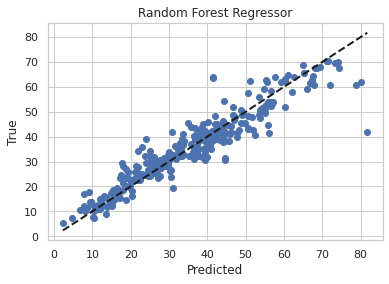

In [164]:
plt.scatter(y_test, y_pred_rfr)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Random Forest Regressor")
plt.show()

The RMSE with Random Forest Regressor is now 5.11, we have reduced the error by ensembling multiple trees.

Feature importances for Decision Tree and Random Forest

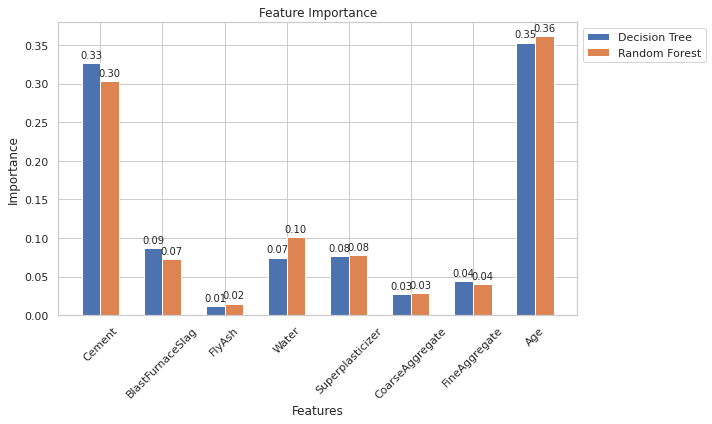

In [165]:
req_col_names = ["Cement", "BlastFurnaceSlag", "FlyAsh", "Water", "Superplasticizer",
                 "CoarseAggregate", "FineAggregate", "Age", "CC_Strength"]
feature_dtr = dtr.feature_importances_
feature_rfr = rfr.feature_importances_

labels = req_col_names[:-1]

x = np.arange(len(labels)) 
width = 0.3

fig, ax = plt.subplots(figsize=(10,6))
rects1 = ax.bar(x-(width/2), feature_dtr, width, label='Decision Tree')
rects2 = ax.bar(x+(width/2), feature_rfr, width, label='Random Forest')

ax.set_ylabel('Importance')
ax.set_xlabel('Features')
ax.set_title('Feature Importance')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
ax.legend(loc="upper left", bbox_to_anchor=(1,1))

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height), xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()

Cement and Age are treated as the most important features by tree based models. Flyash, Coarse and Fine aggregates are least important factors when predicting the strength of Concrete.

## SVR(Support Vector Regressor)

In [166]:
model = SVR(kernel='linear')
model.fit(X_train, y_train)

SVR(kernel='linear')

In [167]:
y_pred = model.predict(X_test)
# performance on train data
print('Performance on training data using SVR:',model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using SVR:',model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_S=metrics.r2_score(y_test, y_pred)
print('Accuracy SVR: ',acc_S)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using SVR: 0.5714816860179592
Performance on testing data using SVR: 0.40887861983556695
Accuracy SVR:  0.40887861983556695
MSE:  162.24050503557118


In [168]:
svm= SVR(kernel='linear')
model4=svm.fit(X_train, y_train)
predictions4 = svm.predict(X_test)
m4=model4.score(X_test, y_test)
RMSE4=np.sqrt(metrics.mean_squared_error(y_test, predictions4))
print('Accuracy of model is', model4.score(X_test, y_test))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions4))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions4))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions4)))

Accuracy of model is 0.40887861983556695
Mean Absolute Error: 8.799027903233842
Mean Squared Error: 162.24050503557118
Root Mean Squared Error: 12.737366487448305


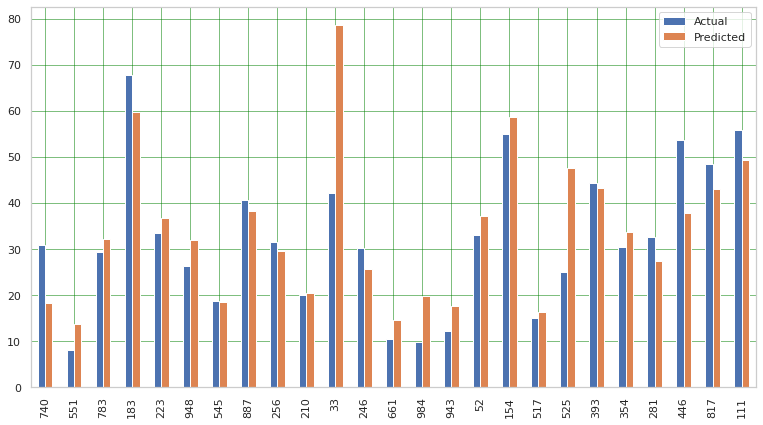

In [169]:
dat = pd.DataFrame({'Actual': y_test, 'Predicted': predictions4})
dat1=dat.head(25) #just a sample which shows top 25 columns
dat1.plot(kind='bar',figsize=(13,7))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Training a polynomial regression model with degree 2, and 3 and compareing it’s performance with other models 

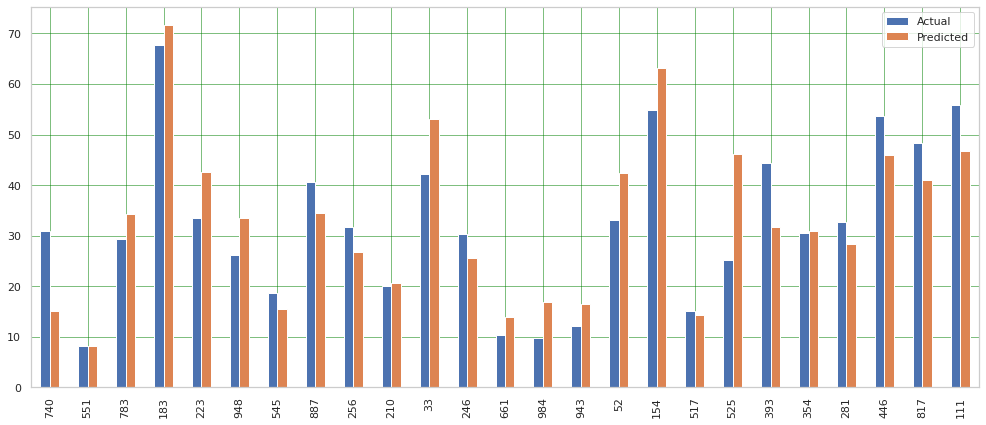

In [170]:
# Polynomial degree 2

train_X1 = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X_train)
test_X1 = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X_test)
regressor = LinearRegression()  
m1=regressor.fit(train_X1, y_train)
y_pred = regressor.predict(test_X1)

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25) #just a sample which shows top 25 columns
df1.plot(kind='bar',figsize=(17,7))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [171]:
# Model Performance
p2=m1.score(test_X1, y_test)
RMSE2=np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Accuracy of model is', m1.score(test_X1, y_test))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Accuracy of model is 0.743813819250805
Mean Absolute Error: 6.2976327595577475
Mean Squared Error: 70.31343602615364
Root Mean Squared Error: 8.385310729254678


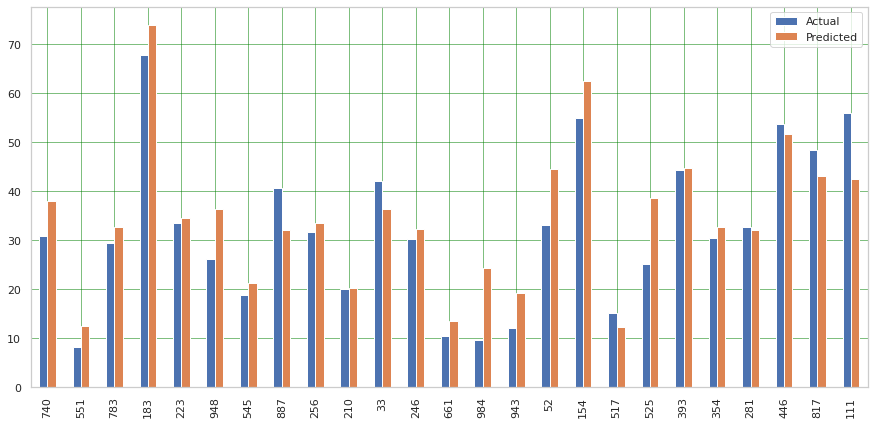

In [172]:
# Polynomial degree 3

train_X1 = PolynomialFeatures(degree=3, include_bias=False).fit_transform(X_train)
test_X1 = PolynomialFeatures(degree=3, include_bias=False).fit_transform(X_test)
regressor = LinearRegression()  
m1=regressor.fit(train_X1, y_train)
y_pred = regressor.predict(test_X1)

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25) #just a sample which shows top 25 columns
df1.plot(kind='bar',figsize=(15,7))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()



In [173]:
# Model Performance
p3=m1.score(test_X1, y_test)
RMSE3=np.sqrt(metrics.mean_squared_error(y_test, y_pred))
             
print('Accuracy of model is', m1.score(test_X1, y_test))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Accuracy of model is 0.7826811561506554
Mean Absolute Error: 5.148903214375688
Mean Squared Error: 59.645819222536595
Root Mean Squared Error: 7.723070582516813


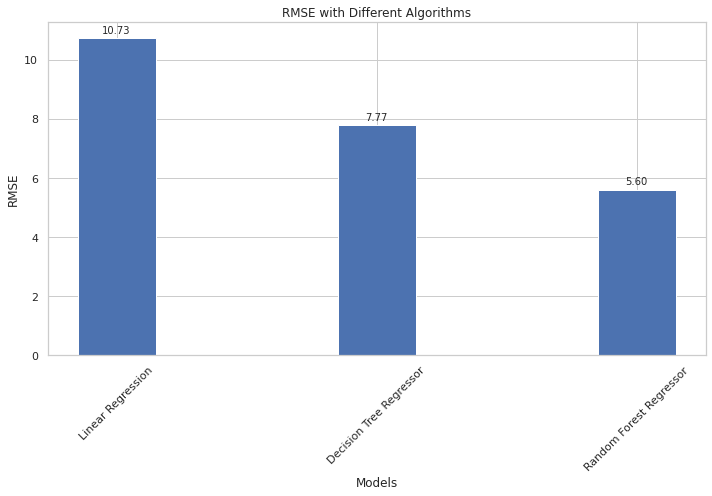

In [177]:
models = [lr, dtr, rfr]
names = ["Linear Regression", "Decision Tree Regressor", "Random Forest Regressor"]
rmses = []

for model in models:
    rmses.append(np.sqrt(mean_squared_error(y_test, model.predict(X_test))))

x = np.arange(len(names)) 
width = 0.3

fig, ax = plt.subplots(figsize=(10,7))
rects = ax.bar(x, rmses, width)
ax.set_ylabel('RMSE')
ax.set_xlabel('Models')
ax.set_title('RMSE with Different Algorithms')
ax.set_xticks(x)
ax.set_xticklabels(names, rotation=45)
autolabel(rects)
fig.tight_layout()
plt.show()

##Conclusion
**Random Forest Regressor** is the best choice for this problem.